# Exemplo usando o Pandas

Importando as bibliotecas.

In [1]:
import pandas as pd               
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean,hmean
from scipy import stats

Carregando a base de dados.

In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
df = pd.DataFrame(data=np.c_[data['data'],data['target']],columns=data['feature_names']+['target'])

Verificando os dados.

In [3]:
df.head(8)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414


O conjunto de dados contém dados agregados sobre cada distrito na Califórnia. Nele, temos informações sobre a demografia (renda, população, ocupação da casa) nos distritos, a localização dos bairros (latitude, longitude) e informações gerais sobre a casa nos bairros (número de quartos, número de salas, idade da casa). O target contém a mediana do valor da casa para cada distrito, o que implica nesse problema ser do tipo regressão.

Verificando as informações do conjunto de dados.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


Das descrições é possível notar que o conjunto de dados contém 20.640 amostras e 8 atributos, todos do tipo float e nenhum dado faltante, o que faz desnecessário realizar algum tratamento.

##Verificando graficamente as distribuições dos atributos do Dataframe

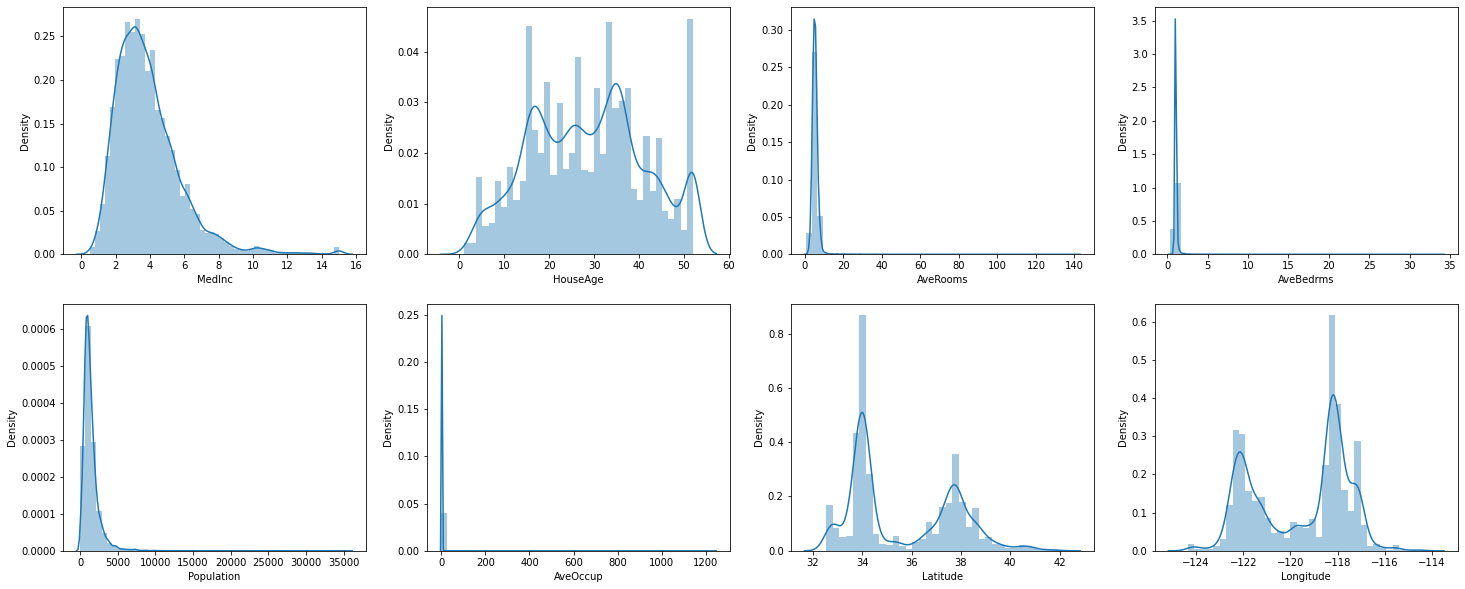

In [4]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

df1 = df.drop(columns='target', axis=1)

fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(25, 10))
for i, column in enumerate(df1.select_dtypes(include=np.number).columns.tolist()):
    sns.distplot(df[column],ax=axes[i//4,i%4])

Visualmente pode-se perceber que nenhum atributo segue distribuição normal, mas algumas informações podem ser extraídas como a renda média que aparenta ser normal mas possui uma alongação que indica que algumas pessoas tem média mais elevada que o comum e a relação de idade média da casa é aproximadamente normal.

##Avaliando a relação da localização da casa com seu valor

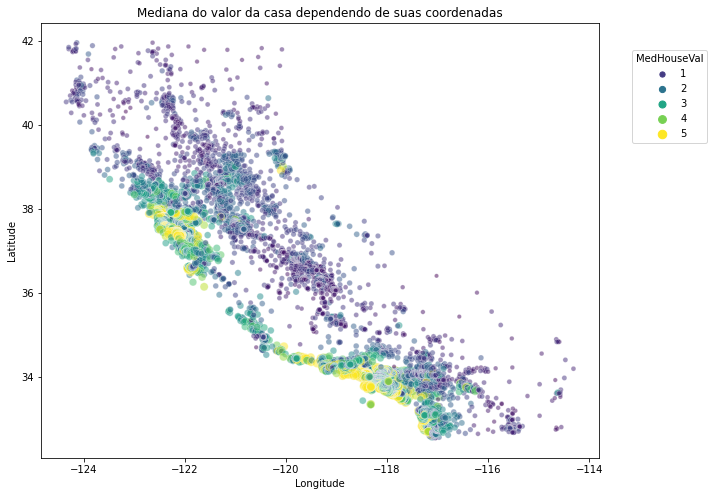

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data.frame, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Mediana do valor da casa dependendo de suas coordenadas")

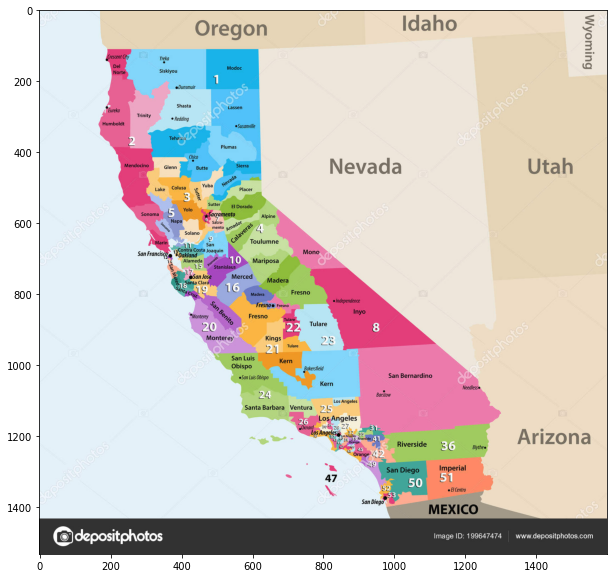

In [21]:
from skimage import io
image = io.imread('https://st4.depositphotos.com/1887293/19964/v/1600/depositphotos_199647474-stock-illustration-vector-high-detailed-map-california.jpg')
plt.figure(figsize=(12,10))
plt.imshow(image)
plt.show()

Se compararmos o gráfico com a imagem do mapa do estado da Califórnia, notamos um fato interessante: As casas de alto valor se concentram na costa do estado, onde ficam as grandes cidades como San Diego, Los Angeles, San Jose e San Francisco. Portanto, as coordenadas latitude e longitude podem ser consideradas fatores importantes na descrição dos valores das casas.

# Medidas de Assimetria
Nos possibilitam analisar uma distribuição em relação a sua moda, mediana e média.

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import kurtosis, skew
%matplotlib inline

Função para calcular estatísticas.

In [ ]:
def calcula_estatisticas(data):
  mean = round(np.mean(data),2)
  mode = round(stats.mode(data,)[0][0],2)
  median = round(np.median(data),2)
  var = round(np.var(data),2)
  std = round(np.std(data),2)
  coef_pearson = round(stats.skew(data),2)
  coef_kurtosis = round(kurtosis(data),2)
  msg = print("Media: {}\nModa: {}\nMediana: {}\nVariância: {}\nDesvio Padrão: {}\nCoeficiente Person: {}\nCoeficiente de Kurtosi: {}".format(mean,mode,median,var,std,coef_pearson,coef_kurtosis))
  return msg

In [ ]:
for nomes in names:
  print("\nEstatísticas de {}:".format(nomes))
  calcula_estatisticas(df[nomes])

## Verificando a distribuição de probabilidade e a diferença entre a média e a mediana.

In [ ]:
for i, column in enumerate(df.select_dtypes(include=np.number).columns.tolist()):
    media = round(df[column].mean(),2)
    std = df[column].std()
    cvar = round(std/media*100,2)
    median = df[column].median()
    print("Atributo: {}, Coeficiente de Variação: {} %, Media: {}, Mediana: {}".format(column,cvar,media,median))

Atributo: MedInc, Coeficiente de Variação: 49.09 %, Media: 3.87, Mediana: 3.5347999999999997
Atributo: HouseAge, Coeficiente de Variação: 43.94 %, Media: 28.64, Mediana: 29.0
Atributo: AveRooms, Coeficiente de Variação: 45.56 %, Media: 5.43, Mediana: 5.229128787878788
Atributo: AveBedrms, Coeficiente de Variação: 43.08 %, Media: 1.1, Mediana: 1.048780487804878
Atributo: Population, Coeficiente de Variação: 79.44 %, Media: 1425.48, Mediana: 1166.0
Atributo: AveOccup, Coeficiente de Variação: 338.31 %, Media: 3.07, Mediana: 2.818115654360196
Atributo: Latitude, Coeficiente de Variação: 5.99 %, Media: 35.63, Mediana: 34.26
Atributo: Longitude, Coeficiente de Variação: -1.68 %, Media: -119.57, Mediana: -118.49


Visualizando a correlação dos dados:

In [ ]:
df.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.0,-0.12,0.33,-0.062,0.0048,0.019,-0.08,-0.015
HouseAge,-0.12,1.0,-0.15,-0.078,-0.3,0.013,0.011,-0.11
AveRooms,0.33,-0.15,1.0,0.85,-0.072,-0.0049,0.11,-0.028
AveBedrms,-0.062,-0.078,0.85,1.0,-0.066,-0.0062,0.07,0.013
Population,0.0048,-0.3,-0.072,-0.066,1.0,0.07,-0.11,0.1
AveOccup,0.019,0.013,-0.0049,-0.0062,0.07,1.0,0.0024,0.0025
Latitude,-0.08,0.011,0.11,0.07,-0.11,0.0024,1.0,-0.92
Longitude,-0.015,-0.11,-0.028,0.013,0.1,0.0025,-0.92,1.0


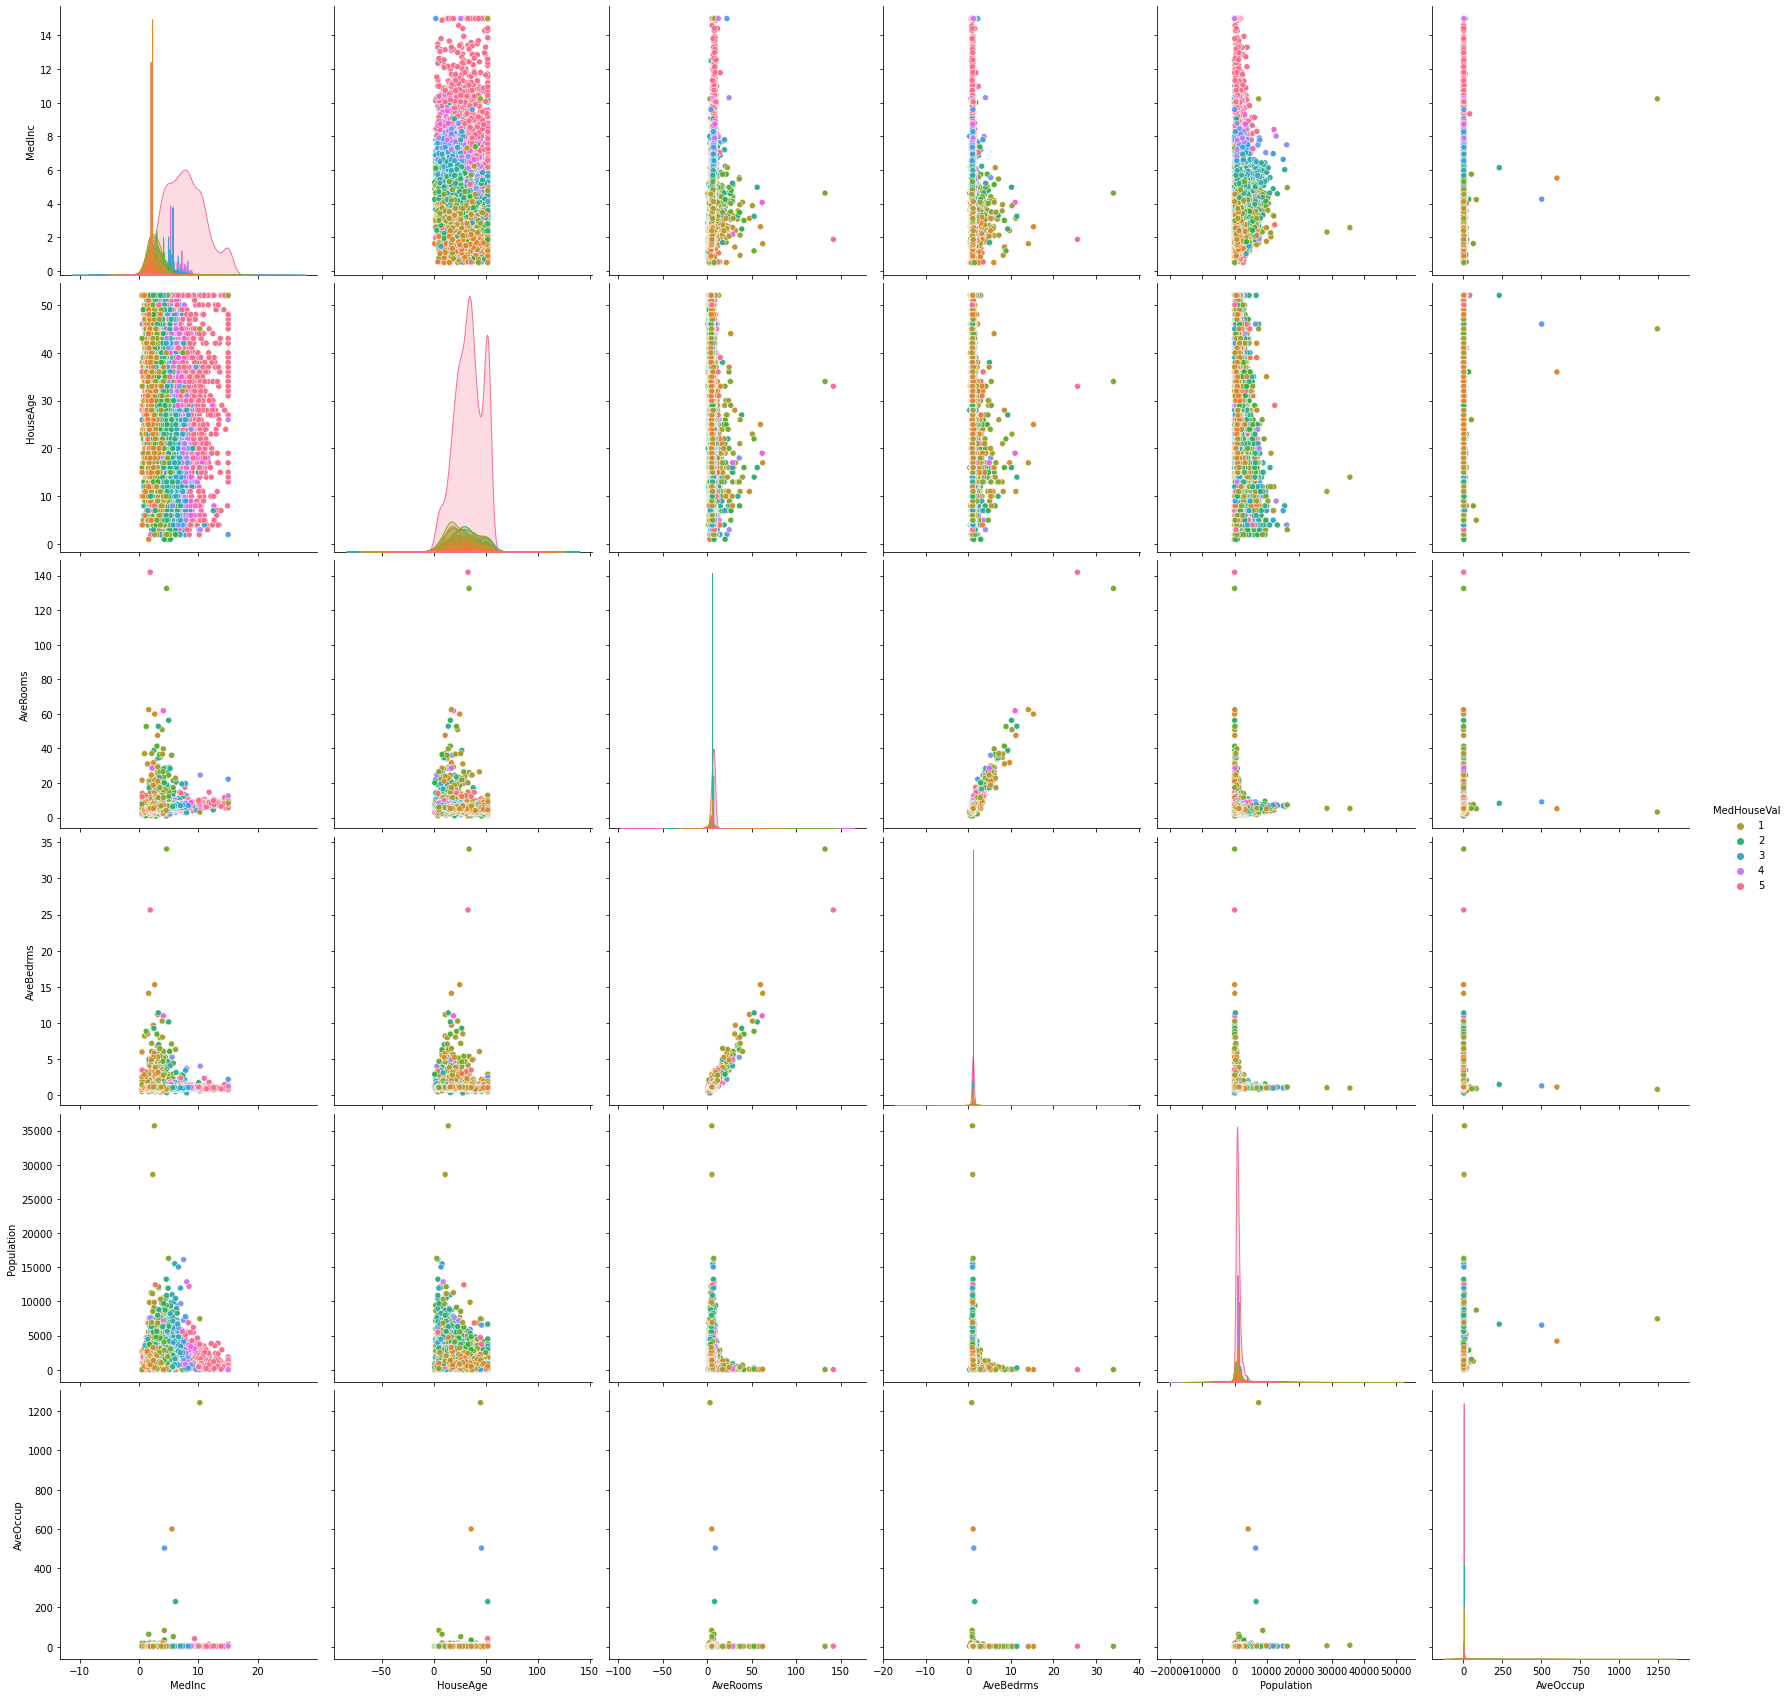

In [6]:
df1 = data.frame.drop(columns=['Latitude', 'Longitude'])
sns.pairplot(df1, hue="MedHouseVal", palette = "husl")

plt.show()

A partir da plotagem pairplot é possível notar a maior correlação entre o total de quartos e o total de salas, ou seja, quanto mais quartos uma casa tem, mais salas ela possui e isso a faz ter custo mais elevado. Logo, conclui-se das análises feitas que o tanto o número de quartos e salas quanto a localização das casas contribuem fortemente para o seu custo.